In [141]:
# import required libraries and modules
import pandas as pd
import numpy as np
from datetime import date, timedelta
from dateutil.relativedelta import *
from random import random, randint

from bokeh.io import output_notebook, show, push_notebook
from bokeh.layouts import column, row
from bokeh.plotting import figure
output_notebook()

from ipywidgets import interact, interactive
import ipywidgets as widgets
from ipywidgets import Box, HBox, VBox, Layout
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

Loading BokehJS ...

In [142]:
def updateTrend(trendType, x, **kwargs):
    if trendType == 'Linear':
        m, c = kwargs['m'], kwargs['c']
        return m * x + c
    elif trendType == 'Curve':
        a, b, c = kwargs['a'], kwargs['b'], kwargs['c']
        return a*x*x + b*x + c 
    return c

def updateBasePlot(level, startdate, intervalType, intervals):
    dateDelta = relativedelta(years = 1 if intervalType =='Years' else 0,
                          months = 1 if intervalType =='Months' else 0,
                          weeks = 1 if intervalType =='Weeks' else 0)
    r.data_source.data['x'] = [startdate + dateDelta * n for n in range(intervals)]
    r.data_source.data['y'] = [level for i in range(intervals)]
    push_notebook()
    
def updateTrendPlot(level, startdate, intervalType, intervals):
    dateDelta = relativedelta(years = 1 if intervalType =='Years' else 0,
                          months = 1 if intervalType =='Months' else 0,
                          weeks = 1 if intervalType =='Weeks' else 0)
    r.data_source.data['x'] = [startdate + dateDelta * n for n in range(intervals)]
    r.data_source.data['y'] = [level for i in range(intervals)]
    push_notebook()

In [143]:
items_layout = Layout(flex='auto', width='auto', height='auto')  
style = {'description_width': '100px'}

# base, starting number of items sold on week-0
level = widgets.IntText(value=100, description='Level')

# starting date of the data-set, picked at random
startdate = widgets.DatePicker(value=date(2008, 1, 1), description='StartDate')

intervalType = widgets.Dropdown(options=[('Years'),('Months'),('Weeks')], value='Months',
                                    description='Interval Type')

# starting date of the data-set, picked at random
intervals = widgets.IntText(value=10, description='Intervals', disabled=False)

In [144]:
dateDelta = relativedelta(years = 1 if intervalType.value =='Years' else 0,
                          months = 1 if intervalType.value =='Months' else 0,
                          weeks = 1 if intervalType.value =='Weeks' else 0)

x = [startdate.value + dateDelta * n for n in range(intervals.value)]
y = [level.value for i in range(intervals.value)]

p = figure(x_axis_type="datetime", plot_width=600, plot_height = 200, title = '01. Default Sales Data')
r = p.line(x, y, line_width=2)

In [157]:
display(HTML('<h2>Setting up the starting values<h2>'))
show(p, notebook_handle=True)
interact(updateBasePlot, level=level, startdate=startdate, intervalType=intervalType, intervals=intervals)

interactive(children=(IntText(value=102, description='Level'), DatePicker(value=datetime.date(2008, 1, 1), des…

<function __main__.updateBasePlot(level, startdate, intervalType, intervals)>

In [164]:
# type of trend 
trend = widgets.Dropdown(options=[('Constant'),('Linear'),('Curve')], value='Constant', description='Trend')
display(HTML('<h3>Choose the trend-type</h3>'))
display(trend)

Dropdown(description='Trend', options=('Constant', 'Linear', 'Curve'), value='Constant')

In [174]:
dateDelta = relativedelta(years = 1 if intervalType.value =='Years' else 0,
                          months = 1 if intervalType.value =='Months' else 0,
                          weeks = 1 if intervalType.value =='Weeks' else 0)

x = [startdate.value + dateDelta * n for n in range(intervals.value)]

if trend.value == 'Linear':
    display(HTML('<h2>Choose slope of line. (<code>y = mx + c</code>)</h2>'))
    m = 
    y = updateTrend(trend.value, range(intervals.value), **{'m': m, c: level.value})
#     interact()
elif trend.value == 'Curve':
    display(HTML('<h2>Choose coefficients A and B. (<code>y = Ax<sup>2</sup> + Bx + c </code>) </h2>'))
#     interact()

y = updateTrend(trend.value, range(intervals.value), **{'m': m, c: level.value})

p = figure(x_axis_type="datetime", plot_width=600, plot_height = 200, title = '01. Default Sales Data')
r = p.line(x, y, line_width=2)

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

enddate = startdate.value + relativedelta(years = intervals.value if intervalType.value =='Years' else 0,
                                          months = intervals.value if intervalType.value =='Months' else 0,
                                          weeks = intervals.value if intervalType.value =='Weeks' else 0)

dateDelta = relativedelta(years = 1 if intervalType.value =='Years' else 0,
                          months = 1 if intervalType.value =='Months' else 0,
                          weeks = 1 if intervalType.value =='Weeks' else 0)

def f_linear(m):
    return updateTrend(intervals.value, trend.value, **{'m': m, 'c': level.value})

def f_curve(a, b):
    return updateTrend(intervals.value, trend.value, **{'a': a, 'b': b, 'c': level.value})
    
if trend.value == 'Linear':
    trendPlot = interactive(f_linear, m=widgets.IntSlider(min=-10, max=10, step=1, value=1))
    output = trendPlot.children[-1]
    display(trendPlot)
elif trend.value == 'Curve':
    trendPlot = interactive(f_curve, a=widgets.IntSlider(min=-10, max=10, step=1, value=1, description='Intervals'), 
                            b=widgets.IntSlider(min=-10, max=10, step=1, value=1))
    output = trendPlot.children[-1]
    display(trendPlot)

<class 'datetime.date'>
<class 'datetime.date'>
<class 'int'>


AttributeError: 'datetime.date' object has no attribute 'value'

interactive(children=(IntSlider(value=100, description='A', max=300, min=-100), IntSlider(value=4, description…

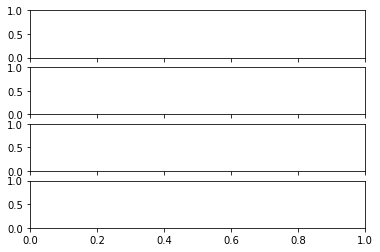

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

display(HTML('<h2>Choose the seasonal pattern</h2>'))

x = np.linspace(1, intervals.value, intervals.value, endpoint=False)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)

def f_sin(A, w, p):
    sin1 = level.value + A * np.sin(2 * np.pi* w * x - p)
    ax1.plot(x, sin1)

i1 = interactive(f_sin, A=100, w=4, p=2)

display(i1)


NameError: name 'df' is not defined

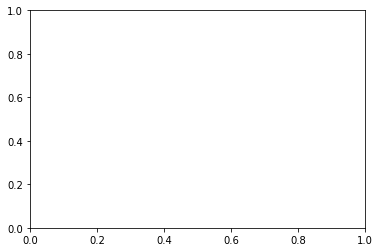

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

# define axes if we want to put multiple plots in the same fig
ax = plt.gca()

df.plot(kind='line', x='week', y='baseline', color='blue', figsize=(12, 6), ax=ax)
df.plot(kind='line', x='week', y='final', color='red', figsize=(12, 6), ax=ax)
plt.show()

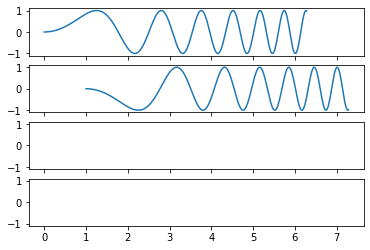

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal

t = np.linspace(1, 200, 200, endpoint=False)

plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
sig1 = 5 * np.sin(2 * np.pi * t * 12)
plt.plot(t, sig1)

plt.subplot(4, 1, 2)
sig2 = 5 * np.sin(-2 * np.pi * t * 6)
plt.plot(t, sig2)

plt.subplot(4, 1, 3)
sig3 = 1 * np.sin(2 * np.pi * t )
plt.plot(t, sig3)

plt.subplot(4, 1, 4)
sig4 = sig1 + sig2 
plt.plot(t, sig4)


In [ ]:
# the simplest form of periodic data is y(t) =A cos(ωt) +B sin(ωt)
# The period of y(t) is the shortest time taken for y(t) to repeat itself, and it is 2π/ω
# y(t) =(k=1 to infinity)∑[A_k cos(ω_k t) + B_k sin(ω_k t)]
# Fourier expansion of y(t)